# Bag of Words Meets Bags of Popcorn

#### Data Set:

The labeled data set consists of 50,000 IMDB movie reviews, specially selected for sentiment analysis. The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. No individual movie has more than 30 reviews. The 25,000 review labeled training set does not include any of the same movies as the 25,000 review test set. In addition, there are another 50,000 IMDB reviews provided without any rating labels.

#### File descriptions:

labeledTrainData - The labeled training set. The file is tab-delimited and has a header row followed by 25,000 rows containing an id, sentiment, and text for each review.

#### Data fields:

id - Unique ID of each review
sentiment - Sentiment of the review; 1 for positive reviews and 0 for negative reviews
review - Text of the review

In [2]:
from bs4 import BeautifulSoup
from ggplot import *
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import hamming_loss
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import metrics, cross_validation
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv("C:/Users/vino2/Documents/3rd SEM/680 - Marketing Analytic/Kaggle word2vec/Data/labeledTrainData.tsv",
                  header = 0,
                  delimiter = "\t",
                  quoting = 3)

In [4]:
print(data.shape)

(25000, 3)


In [5]:
print(data.columns.values)    

['id' 'sentiment' 'review']


In [6]:
print(data["review"][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

# Data Cleaning and Text preprocessing

##### 1. BeautifulSoup Package – Removing HTML Markup
##### 2. Regular Expression – To remove punctuation and numbers
##### 3. Converting reviews to lowercase and split them into individual words
##### 4. Stopwords list from NLTK– Removing words like “a”, “the”, “and”, “is” etc
##### 5. NLTK porter stemmer – It allows us to treat “message”, “messages”, “messaging” as a single word

In [7]:
# Testing the beautifulsoup package with the first review
first_review = BeautifulSoup(data["review"][0], "html.parser")

# Printing the original strings
print(data["review"][0])

# Printing the review after removing html markups using beautiful soup package
print(first_review.get_text())

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [8]:
# Keeping only the Alphabets and removing .,! etc using regular expression
alphabets_only = re.sub("[^a-zA-Z]", " ", first_review.get_text())
print(alphabets_only)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [9]:
# Converting all values to lower case and splitting them
lowercase = alphabets_only.lower()
words = lowercase.split()
print(words)

['with', 'all', 'this', 'stuff', 'going', 'down', 'at', 'the', 'moment', 'with', 'mj', 'i', 've', 'started', 'listening', 'to', 'his', 'music', 'watching', 'the', 'odd', 'documentary', 'here', 'and', 'there', 'watched', 'the', 'wiz', 'and', 'watched', 'moonwalker', 'again', 'maybe', 'i', 'just', 'want', 'to', 'get', 'a', 'certain', 'insight', 'into', 'this', 'guy', 'who', 'i', 'thought', 'was', 'really', 'cool', 'in', 'the', 'eighties', 'just', 'to', 'maybe', 'make', 'up', 'my', 'mind', 'whether', 'he', 'is', 'guilty', 'or', 'innocent', 'moonwalker', 'is', 'part', 'biography', 'part', 'feature', 'film', 'which', 'i', 'remember', 'going', 'to', 'see', 'at', 'the', 'cinema', 'when', 'it', 'was', 'originally', 'released', 'some', 'of', 'it', 'has', 'subtle', 'messages', 'about', 'mj', 's', 'feeling', 'towards', 'the', 'press', 'and', 'also', 'the', 'obvious', 'message', 'of', 'drugs', 'are', 'bad', 'm', 'kay', 'visually', 'impressive', 'but', 'of', 'course', 'this', 'is', 'all', 'about', 

In [10]:
nltk_words = [words for sent in nltk.sent_tokenize(lowercase) for word in nltk.word_tokenize(sent)]

In [11]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [12]:
# Removing all the stopwords from the list of words.
filtered_words = [w for w in words if not w in stopwords.words("english")]
print(filtered_words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [13]:
# Stemming is a process which treats strings like message, messages, messaging as a single word
# Using SnowballStemmer to do the process here
stemmer = SnowballStemmer("english")

stem_words = [stemmer.stem(w) for w in filtered_words]
print(stem_words)

['stuff', 'go', 'moment', 'mj', 'start', 'listen', 'music', 'watch', 'odd', 'documentari', 'watch', 'wiz', 'watch', 'moonwalk', 'mayb', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'realli', 'cool', 'eighti', 'mayb', 'make', 'mind', 'whether', 'guilti', 'innoc', 'moonwalk', 'part', 'biographi', 'part', 'featur', 'film', 'rememb', 'go', 'see', 'cinema', 'origin', 'releas', 'subtl', 'messag', 'mj', 'feel', 'toward', 'press', 'also', 'obvious', 'messag', 'drug', 'bad', 'kay', 'visual', 'impress', 'cours', 'michael', 'jackson', 'unless', 'remot', 'like', 'mj', 'anyway', 'go', 'hate', 'find', 'bore', 'may', 'call', 'mj', 'egotist', 'consent', 'make', 'movi', 'mj', 'fan', 'would', 'say', 'made', 'fan', 'true', 'realli', 'nice', 'actual', 'featur', 'film', 'bit', 'final', 'start', 'minut', 'exclud', 'smooth', 'crimin', 'sequenc', 'joe', 'pesci', 'convinc', 'psychopath', 'power', 'drug', 'lord', 'want', 'mj', 'dead', 'bad', 'beyond', 'mj', 'overheard', 'plan', 'nah', 'joe', 'pesci', 

### Putting it all together

In [14]:
stemmer = SnowballStemmer("english")

stopwords_ = set(stopwords.words("english"))

# All the process is combined in this function convert_reviews_to_words
def convert_reviews_to_words(review):
    review_text = BeautifulSoup(review, "html.parser").get_text()
    alphabets_only = re.sub("[^a-zA-Z]", " ", review_text)
    words = alphabets_only.lower().split()
    meaningful_words = [w for w in words if not w in stopwords_]
    stemmed_words = [stemmer.stem(w) for w in meaningful_words]
    print(stemmed_words)
    return(" ".join(stemmed_words))


In [3]:
no_of_reviews = data["review"].size
cleaned_data_reviews = []

# Calling the convert_reviews_to_words function for every review in the dataset
# Appending those values to cleaned_data_reviews list
print("Cleaning and parsing the movie reviews from data....")
for i in range(0, no_of_reviews):
    if((i+1)%1000 == 0):
        #print("Review %d of %d complete" % (i+1, no_of_reviews))
    cleaned_data_reviews.append(convert_reviews_to_words(data["review"][i]))
    
print("Cleaning and Parsing complete.")

In [16]:
print(cleaned_data_reviews[:][0:20])

['stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl sta

# Bag of Words

### Bag of words model: <br>
Takes all the words from a sentence and then models them by counting how many times each word appears.

#### Example:
Sentence 1: “The cat sat on the hat”<br>
Sentence 2: “The dog ate the cat and the hat”<br>

Vocabularies from both the sentences: <br>
[the, cat, sat, on, hat, dog, ate, and]

Feature vector for both the sentences:<br>
Sentence 1: [2,1,1,1,1,0,0,0]<br>
Sentence 2: [3,1,0,0,1,1,1,1]<br>

In the IMDB data there are many too many reviews and we get large vocabularies from it. So in order to reduce the number of feature vector we set the maximum features to be 1000. Those are thousand most frequent words.<br>

Using feature_extraction moodule from scikit-learning to create bag of words bag of words features.

In [17]:
print("Starting Bag of Words...")

# The CountVectorizer function does the bag of words process
# Since the data cleaning and the text processing was done separately in the previous section
# assigning tokenizer, preprocessor, and stopwords as None
# max_feature = number of features to be taken into account. It takes into account the top first 1000 frequent words
vectorizer = CountVectorizer(analyzer="word", 
                             tokenizer=None, 
                             preprocessor=None,
                             stop_words=None,
                             max_features=1000)

data_features = vectorizer.fit_transform(cleaned_data_reviews)
data_features = data_features.toarray()

Starting Bag of Words...


The data now has 25000 rows and 1000 features.

In [18]:
print(data_features.shape)

(25000, 1000)


We can now take a look at the vocabularies that we get after initiating the Bag of Words model.

In [19]:
# Printing the features
vocabulary = vectorizer.get_feature_names()
print(vocabulary)

['abil', 'abl', 'absolut', 'accent', 'accept', 'achiev', 'across', 'act', 'action', 'actor', 'actress', 'actual', 'ad', 'adapt', 'add', 'admit', 'adult', 'adventur', 'age', 'ago', 'agre', 'air', 'alien', 'allow', 'almost', 'alon', 'along', 'alreadi', 'also', 'although', 'alway', 'amaz', 'america', 'american', 'among', 'amount', 'amus', 'anim', 'ann', 'annoy', 'anoth', 'answer', 'anyon', 'anyth', 'anyway', 'apart', 'appar', 'appeal', 'appear', 'appreci', 'approach', 'around', 'art', 'artist', 'ask', 'aspect', 'atmospher', 'attack', 'attempt', 'attent', 'attract', 'audienc', 'averag', 'avoid', 'aw', 'award', 'away', 'babi', 'back', 'background', 'bad', 'band', 'bare', 'base', 'basic', 'battl', 'beat', 'beauti', 'becam', 'becom', 'begin', 'behind', 'believ', 'ben', 'best', 'better', 'beyond', 'big', 'bill', 'bit', 'black', 'blood', 'bodi', 'book', 'bore', 'bother', 'box', 'boy', 'brain', 'break', 'brilliant', 'bring', 'british', 'brother', 'brought', 'budget', 'build', 'bunch', 'burn', 'b

In [20]:
print(data_features)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [4]:
# Frequency of each word in the feature vector
dist = np.sum(data_features, axis=0)
for tag, count in zip(vocabulary, dist):
    print(tag, count)

# Classification

Predicting the sentiment of each reviews using the models such as:

1. Random Forest
2. Logistic Regression
3. Support Vector Machine (SVM)

# Random Forest

In [23]:
# Splitting the data into training and test with the ratio of 80:20
xtrain, xtest, ytrain, ytest = train_test_split(data_features,
                                                data["sentiment"].values, 
                                                test_size = 0.2)

print("Training the random forest...")

# Training the data using random forest model
forest = RandomForestClassifier(n_estimators = 100)
forest_model = forest.fit(xtrain, ytrain)

Training the random forest...


In [24]:
# Predicting the model
ypred = forest_model.predict(xtest)

print(1-hamming_loss(ypred, ytest))

0.8196


In [25]:
# Confusion matrix for train data
conf_matrix = confusion_matrix(ytest, ypred)
conf_matrix

array([[2018,  427],
       [ 475, 2080]], dtype=int64)

AUC:0.905723089976


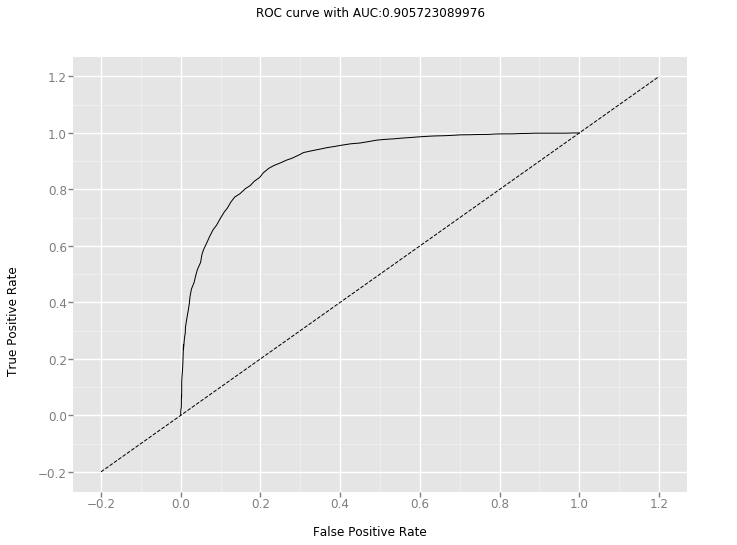

<ggplot: (174732687294)>

In [30]:
# AUC score and ROC curve for train data
predict_ = forest.predict_proba(xtest)[:, 1]
fpr, tpr, _ = metrics.roc_curve(ytest, predict_)

auc = metrics.roc_auc_score(ytest, predict_)
print("AUC:" + str(auc))

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y="tpr")) + geom_line() + geom_abline(linetype='dashed') + ggtitle("ROC curve with AUC:%s" % str(auc)) + xlab("False Positive Rate") + ylab("True Positive Rate")

In [31]:
# Model Prediction with 10 cross validation
predicted = cross_validation.cross_val_predict(forest, xtest, ytest, cv=10)
print(metrics.accuracy_score(ytest, predicted))

0.82964


In [33]:
# Confusion matrix
conf_matrix = confusion_matrix(data["sentiment"].values, predicted)
conf_matrix

array([[10352,  2148],
       [ 2111, 10389]], dtype=int64)

In [2]:
#predict_1 = predicted.predict(data_features)[:, 1000]
#fpr, tpr, _ = metrics.roc_curve(data["sentiment"].values, predict_1)

#auc = metrics.roc_auc_score(data["sentiment"].values, predict_1)
#print("AUC:" + str(auc))

#df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
#ggplot(df, aes(x='fpr', y="tpr")) + geom_line() + geom_abline(linetype='dashed') + ggtitle("ROC curve with AUC:%s" % str(auc)) + xlab("False Positive Rate") + ylab("True Positive Rate")

# Logistic Regression

In [38]:
logreg = LogisticRegression()
logreg_model = logreg.fit(xtrain, ytrain)

In [39]:
ypred1 = logreg_model.predict(xtest)

In [40]:
conf_matrix2 = confusion_matrix(ytest, ypred1)
conf_matrix2

array([[2065,  380],
       [ 355, 2200]], dtype=int64)

In [41]:
print(1-hamming_loss(ypred1, ytest))

0.853


AUC:0.926903661372


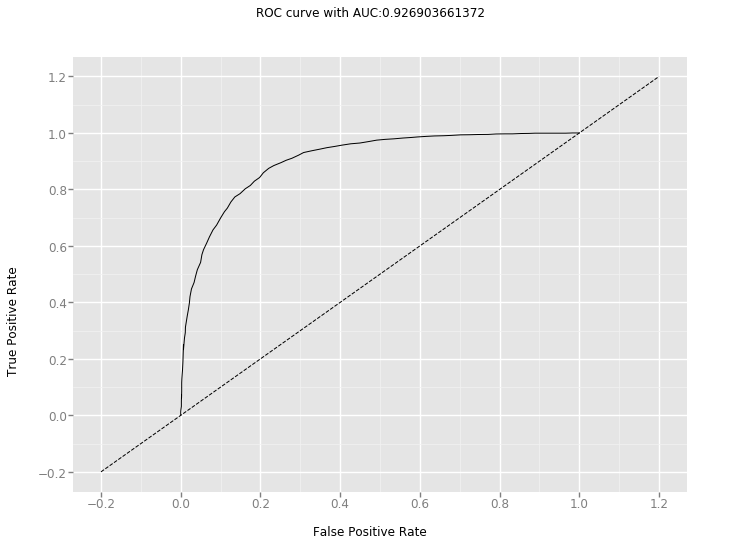

<ggplot: (174735586838)>

In [43]:
preds = logreg.predict_proba(xtest)[:, 1]
fpr2, tpr2, _ = metrics.roc_curve(ytest, preds)

auc1 = metrics.roc_auc_score(ytest, preds)
print("AUC:" + str(auc1))

df2 = pd.DataFrame(dict(fpr=fpr2, tpr=tpr2))
ggplot(df, aes(x='fpr', y="tpr")) + geom_line() + geom_abline(linetype='dashed') + ggtitle("ROC curve with AUC:%s" % str(auc1)) + xlab("False Positive Rate") + ylab("True Positive Rate")

In [44]:
print(metrics.roc_auc_score(ytest, preds))

0.926903661372


In [45]:
predicted2 = cross_validation.cross_val_predict(LogisticRegression(), data_features, data["sentiment"].values, cv=10)
print(metrics.accuracy_score(data["sentiment"].values, predicted2))

0.85632


In [ ]:
conf_matrix = confusion_matrix(data["sentiment"].values, predicted2)
conf_matrix

# SVM

In [54]:
svm_ = svm.SVC(kernel = "linear", C = 1, probability = True)

In [55]:
svm_model = svm_.fit(xtrain, ytrain)
svm_.score(xtrain, ytrain)

0.88439999999999996

In [56]:
ypred2 = svm_model.predict(xtest)

In [49]:
conf_matrix2 = confusion_matrix(ytest, ypred2)
conf_matrix2

array([[2052,  393],
       [ 352, 2203]], dtype=int64)

In [50]:
print(1-hamming_loss(ypred2, ytest))

0.851


AUC:0.925165860276


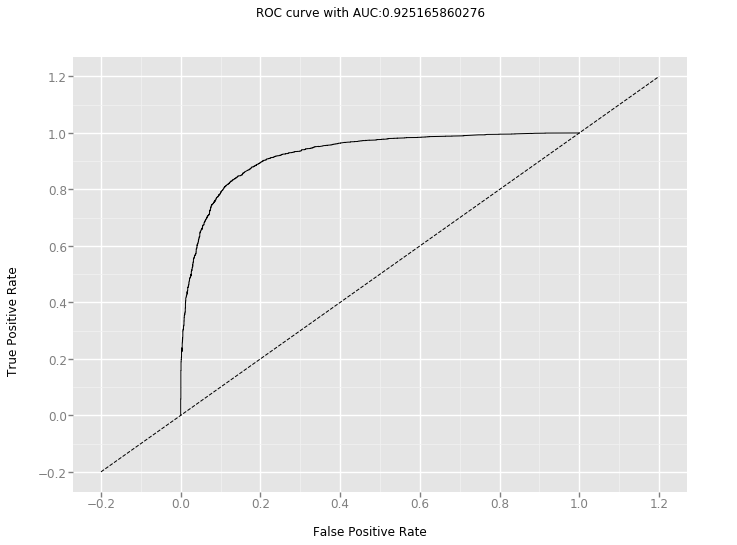

<ggplot: (174724739220)>

In [57]:
preds3 = svm_.predict_proba(xtest)[:, 1]
fpr3, tpr3, _ = metrics.roc_curve(ytest, preds3)

auc3 = metrics.roc_auc_score(ytest, preds3)
print("AUC:" + str(auc3))

df3 = pd.DataFrame(dict(fpr=fpr3, tpr=tpr3))
ggplot(df3, aes(x='fpr', y="tpr")) + geom_line() + geom_abline(linetype='dashed') + ggtitle("ROC curve with AUC:%s" % str(auc3)) + xlab("False Positive Rate") + ylab("True Positive Rate")

In [60]:
predicted3 = cross_val_predict(svm_, xtest, ytest, cv=10, method='predict_proba')
scores = predicted3[:,1]
fpr, tpr, thresholds = roc_curve(ytest, scores)

In [59]:
conf_matrix = confusion_matrix(ytest, scores)
print(conf_matrix)
#scores.size
print(metrics.accuracy_score(ytest, predicted3))

[[1943  502]
 [ 480 2075]]
0.8036


AUC:0.883328971222


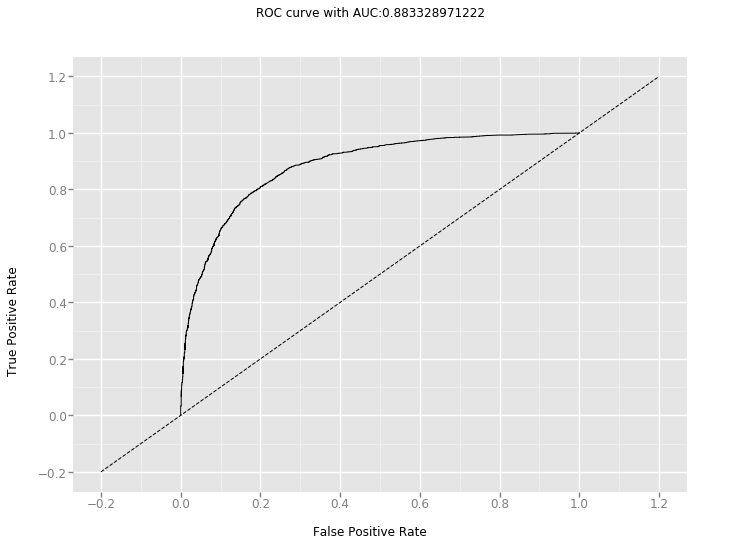

<ggplot: (-9223371862117908904)>

In [61]:
auc_cm2 = metrics.roc_auc_score(ytest, scores)
print("AUC:" + str(auc_cm2))

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y="tpr")) + geom_line() + geom_abline(linetype='dashed') + ggtitle("ROC curve with AUC:%s" % str(auc_cm2)) + xlab("False Positive Rate") + ylab("True Positive Rate")

## Conclusion:

Among the three classification models, Logistic Regression predicts much better without 10 cross validation having AUC score 0.9285 and Random Forest predicts better with 10 cross validation whose AUC score is 0.8953.